In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
X_more=np.loadtxt('data/C8_568.txt')
X_few=np.loadtxt('data/C16_67.txt')
print(X_more.shape)
print(X_few.shape)

(568, 7)
(67, 7)


In [3]:
Y_few=np.zeros([X_few.shape[0],])
Y_more=np.ones([X_more.shape[0],])
X_old=np.concatenate([X_few,X_more])
Y_old=np.concatenate([Y_few,Y_more])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X_old, Y_old, test_size=.3)

In [5]:
model = SVC(kernel='linear', C=1E10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print('ACC:',accuracy_score(y_test,y_pred))
false_positive_rate_s, true_positive_rate_s, thresholds = roc_curve(y_test,y_pred)
roc_auc_svm = auc(false_positive_rate_s, true_positive_rate_s)
print('AUC_SVM_ORIGIN:',roc_auc_svm)
tpr=true_positive_rate_s[1]
fpr=false_positive_rate_s[1]
tnr=1-fpr
g_mean=np.sqrt(tpr*tnr)
print('G-Mean:',g_mean)

              precision    recall  f1-score   support

         0.0       0.87      0.57      0.68        23
         1.0       0.94      0.99      0.97       168

    accuracy                           0.94       191
   macro avg       0.90      0.78      0.82       191
weighted avg       0.93      0.94      0.93       191

ACC: 0.93717277486911
AUC_SVM_ORIGIN: 0.776656314699793
G-Mean: 0.7473209570435175


In [6]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print('ACC:',accuracy_score(y_test,y_pred))
false_positive_rate_r, true_positive_rate_r, thresholds = roc_curve(y_test,y_pred)
roc_auc_rf = auc(false_positive_rate_r, true_positive_rate_r)
print('AUC_RF_ORIGIN:',roc_auc_rf)
tpr=true_positive_rate_r[1]
fpr=false_positive_rate_r[1]
tnr=1-fpr
g_mean=np.sqrt(tpr*tnr)
print('G-Mean:',g_mean)

              precision    recall  f1-score   support

         0.0       0.90      0.39      0.55        23
         1.0       0.92      0.99      0.96       168

    accuracy                           0.92       191
   macro avg       0.91      0.69      0.75       191
weighted avg       0.92      0.92      0.91       191

ACC: 0.9214659685863874
AUC_RF_ORIGIN: 0.692675983436853
G-Mean: 0.6236787276150302


In [7]:
center=np.mean(X_few,0)
print(center)

[0.58753731 0.46843284 0.17186567 1.13338806 0.42171642 0.23976866
 0.37785821]


In [8]:
np.random.seed(1)
while True:
    X_new=np.zeros((X_more.shape[0]*2,7))
    for j in range(X_few.shape[0]):
        X_new[j]=X_few[j]+0.5*(center-X_few[j])
        X_new[j+X_few.shape[0]]=X_few[j]
    for i in range(X_more.shape[0]*2-X_few.shape[0]*2):
        while True:
            ind1 = np.random.randint(X_few.shape[0])
            ind2 = np.random.randint(X_few.shape[0])
            if ind1!= ind2:
                break
        X_new[i+X_few.shape[0]*2]=X_new[ind1]+0.5*(X_new[ind2]-X_new[ind1])
    A=np.array(list(set([tuple(t) for t in X_new])))
    if A.shape[0]>=X_more.shape[0]:
        break
print('Non-duplicate items：',A.shape[0])

Non-duplicate items： 967


In [9]:
X_new=A[:X_more.shape[0]]
X_new.shape

(568, 7)

In [10]:
X=np.concatenate([X_new,X_more])
Y_new = np.zeros([X_more.shape[0],])
Y=np.concatenate([Y_new,Y_more])
Y.shape

(1136,)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3)

In [12]:
model = SVC(kernel='linear', C=1E10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print('ACC:',accuracy_score(y_test,y_pred))
false_positive_rate_s1, true_positive_rate_s1, thresholds = roc_curve(y_test,y_pred)
roc_auc_svm_1 = auc(false_positive_rate_s1, true_positive_rate_s1)
print('AUC_SVM_OUR:',roc_auc_svm_1)
tpr=true_positive_rate_s1[1]
fpr=false_positive_rate_s1[1]
tnr=1-fpr
g_mean=np.sqrt(tpr*tnr)
print('G-Mean:',g_mean)

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       177
         1.0       0.98      0.96      0.97       164

    accuracy                           0.97       341
   macro avg       0.97      0.97      0.97       341
weighted avg       0.97      0.97      0.97       341

ACC: 0.9706744868035191
AUC_SVM_OUR: 0.9704078820449221
G-Mean: 0.9703826832846619


In [13]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print('ACC:',accuracy_score(y_test,y_pred))
false_positive_rate_r1, true_positive_rate_r1, thresholds = roc_curve(y_test,y_pred)
roc_auc_rf_1 = auc(false_positive_rate_r1, true_positive_rate_r1)
print('AUC_RF_OUR:',roc_auc_rf_1)
tpr=true_positive_rate_r1[1]
fpr=false_positive_rate_r1[1]
tnr=1-fpr
g_mean=np.sqrt(tpr*tnr)
print('G-Mean:',g_mean)

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       177
         1.0       0.97      0.95      0.96       164

    accuracy                           0.96       341
   macro avg       0.96      0.96      0.96       341
weighted avg       0.96      0.96      0.96       341

ACC: 0.9618768328445748
AUC_RF_OUR: 0.9614854623122502
G-Mean: 0.9614306550687856


In [14]:
smo = SMOTE()
Xs, Ys = smo.fit_sample(X_old,Y_old)
x_train, x_test, y_train, y_test = train_test_split(Xs, Ys, test_size=.3)
model = SVC(kernel='linear', C=1E10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print('ACC:',accuracy_score(y_test,y_pred))
false_positive_rate_s2, true_positive_rate_s2, thresholds = roc_curve(y_test,y_pred)
roc_auc_svm_2 = auc(false_positive_rate_s2, true_positive_rate_s2)
print('AUC_SVM_SMOTE:',roc_auc_svm_2)
tpr=true_positive_rate_s2[1]
fpr=false_positive_rate_s2[1]
tnr=1-fpr
g_mean=np.sqrt(tpr*tnr)
print('G-Mean:',g_mean)

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       172
         1.0       0.96      0.90      0.93       169

    accuracy                           0.93       341
   macro avg       0.93      0.93      0.93       341
weighted avg       0.93      0.93      0.93       341

ACC: 0.9296187683284457
AUC_SVM_SMOTE: 0.929355304802532
G-Mean: 0.9288726815398748


In [15]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
print('ACC:',accuracy_score(y_test,y_pred))
false_positive_rate_r2, true_positive_rate_r2, thresholds = roc_curve(y_test,y_pred)
roc_auc_rf_2 = auc(false_positive_rate_r2, true_positive_rate_r2)
print('AUC_RF_SMOTE:',roc_auc_rf_2)
tpr=true_positive_rate_r2[1]
fpr=false_positive_rate_r2[1]
tnr=1-fpr
g_mean=np.sqrt(tpr*tnr)
print('G-Mean:',g_mean)

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       172
         1.0       0.95      0.93      0.94       169

    accuracy                           0.94       341
   macro avg       0.94      0.94      0.94       341
weighted avg       0.94      0.94      0.94       341

ACC: 0.9413489736070382
AUC_RF_SMOTE: 0.9412928306041007
G-Mean: 0.9412711980514816


In [16]:
center1=np.mean(X_new,0)
center2=np.mean(Xs[Y_old.shape[0]:],0)
op1=np.linalg.norm(center1-center)
op2=np.linalg.norm(center2-center)
print('Off-centering')
print('Ours:',op1)
print('SMOTE:',op2)

Off-centering
Ours: 0.0024975837663907966
SMOTE: 0.024868650210981263


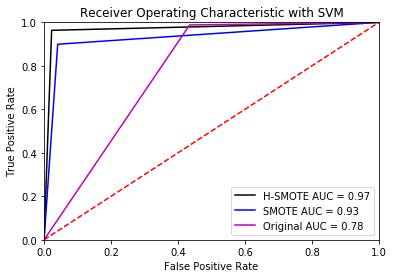

In [17]:
#Plot ROC Curve with SVM
plt.title('Receiver Operating Characteristic with SVM')
plt.plot(false_positive_rate_s1, true_positive_rate_s1, 'k',label='H-SMOTE AUC = %0.2f'% roc_auc_svm_1)
plt.plot(false_positive_rate_s2, true_positive_rate_s2, 'b',label='SMOTE AUC = %0.2f'% roc_auc_svm_2)
plt.plot(false_positive_rate_s, true_positive_rate_s, 'm',label='Original AUC = %0.2f'% roc_auc_svm)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

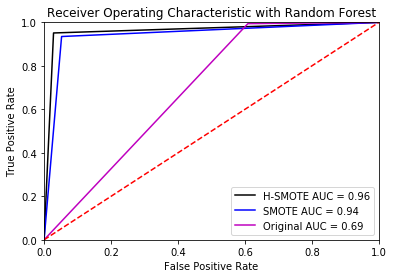

In [18]:
#Plot ROC Curve with RF
plt.title('Receiver Operating Characteristic with Random Forest')
plt.plot(false_positive_rate_r1, true_positive_rate_r1, 'k',label='H-SMOTE AUC = %0.2f'% roc_auc_rf_1)
plt.plot(false_positive_rate_r2, true_positive_rate_r2, 'b',label='SMOTE AUC = %0.2f'% roc_auc_rf_2)
plt.plot(false_positive_rate_r, true_positive_rate_r, 'm',label='Original AUC = %0.2f'% roc_auc_rf)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()